## **Importing Libraries**

In [11]:
# General Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
from matplotlib import rcParams
plt.style.use('ggplot')

# Machine Learnings Libraries
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from nltk.tokenize import RegexpTokenizer
from collections import Counter


## **Loading Dataset**

In [3]:
#Loading dataset
df = pd.read_csv('../data_file/tweet_sentiments.csv', encoding='ISO-8859-1')

#Display The first five columns of the dataset
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## **Exploratory Data Analysis**

In [4]:
#Checking the shape of the  dataset
df.shape

(9093, 3)

The shape of our dataset, (9093, 3), which indicates that we have 9,093 rows and 3 columns. Here's a breakdown of what each dimension typically represents in this context:

Rows (9093): This is the number of tweets in our dataset, meaning we have 9,093 individual tweets to analyze.

Columns (3): This likely represents:

**tweet_text:** The text content of the tweet.

**emotion_in_tweet_is_directed_at:** The specific brand or product that the emotion in the tweet is directed towards.

**is_there_an_emotion_directed_at_a_brand_or_product:** The sentiment or emotion expressed in relation to the brand or product (e.g., positive or negative).

In [5]:
df.info

<bound method DataFrame.info of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                

In [6]:
# Check for any missing values 
df.isnull().sum()


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
# Check which entry is missing in tweet_text
missing_tweet = df[df['tweet_text'].isnull()]
print("Missing tweet text:")
print(missing_tweet)

# Analyze the distribution of emotions directed at brands/products
emotion_counts = df['emotion_in_tweet_is_directed_at'].isnull().sum()
print(f"Number of missing emotions directed at a brand or product: {emotion_counts}")

# Check the distribution of values in the sentiment column
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print("Distribution of sentiment toward brand or product:")
print(sentiment_counts)
df.info()

Missing tweet text:
  tweet_text emotion_in_tweet_is_directed_at  \
6        NaN                             NaN   

  is_there_an_emotion_directed_at_a_brand_or_product  
6                 No emotion toward brand or product  
Number of missing emotions directed at a brand or product: 5802
Distribution of sentiment toward brand or product:
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-nul

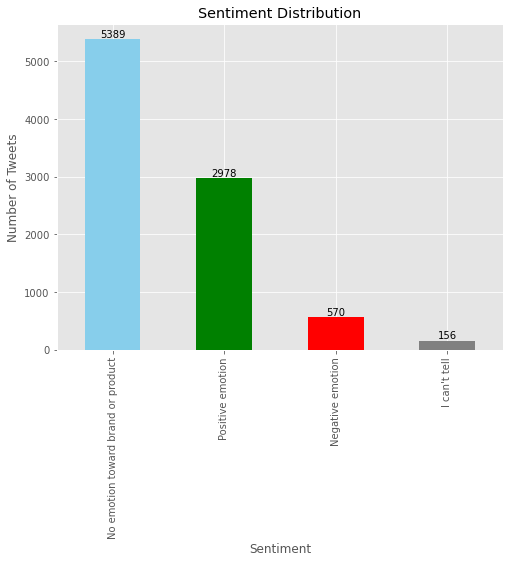

In [8]:
# Check the distribution of the sentiment
sentiment_distribution = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(kind='bar', color=['skyblue', 'green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


**Sentiment Toward Brand or Product (is_there_an_emotion_directed_at_a_brand_or_product)**

The distribution is:

5389 entries show no emotion toward a brand or product.

2978 entries show positive emotion.

570 entries show negative emotion.

156 entries have the value "I can't tell.

**Missing Tweet Text**

The cleaned dataset now has 9092 rows, with no missing entries in the tweet_text column. This means that our original dataset contained 9093 rows, but after removing the rows with missing tweet_text, we were left with 9092 rows. This is a small reduction in the number of rows, but it is a necessary step to ensure that we have a complete dataset for analysis.



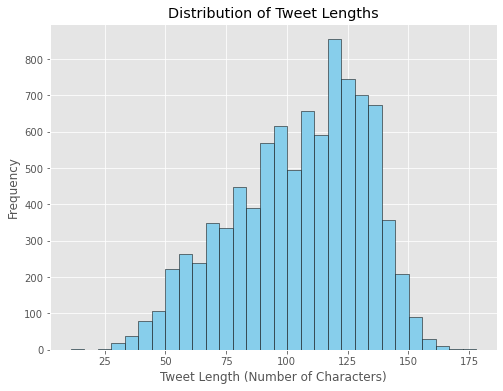

In [9]:
# Analyze the text length by calculating the number of characters in each tweet
tweet_lengths = df['tweet_text'].str.len()

# Plot the distribution of tweet lengths
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Clean the tweet_text by dropping rows with missing text values
df_cleaned = df.dropna(subset=['tweet_text'])

# Tokenize the cleaned tweets by sentiment
positive_tweets = df_cleaned[df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['tweet_text'].str.split()
negative_tweets = df_cleaned[df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['tweet_text'].str.split()
neutral_tweets = df_cleaned[df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']['tweet_text'].str.split()

# Flatten the tokenized tweets into a single list per sentiment
positive_words = [word.lower() for tweet in positive_tweets for word in tweet if word]
negative_words = [word.lower() for tweet in negative_tweets for word in tweet if word]
neutral_words = [word.lower() for tweet in neutral_tweets for word in tweet if word]

# Count the most common words in each sentiment
positive_common_words = Counter(positive_words).most_common(10)
negative_common_words = Counter(negative_words).most_common(10)
neutral_common_words = Counter(neutral_words).most_common(10)

positive_common_words, negative_common_words, neutral_common_words

([('#sxsw', 2506),
  ('@mention', 2062),
  ('the', 1578),
  ('{link}', 1202),
  ('to', 1146),
  ('at', 999),
  ('rt', 913),
  ('for', 904),
  ('ipad', 793),
  ('a', 777)],
 [('#sxsw', 512),
  ('the', 300),
  ('@mention', 292),
  ('to', 255),
  ('is', 159),
  ('a', 151),
  ('ipad', 140),
  ('at', 137),
  ('rt', 137),
  ('of', 131)],
 [('#sxsw', 4680),
  ('@mention', 4249),
  ('{link}', 2904),
  ('the', 2409),
  ('to', 2112),
  ('at', 1868),
  ('rt', 1814),
  ('for', 1474),
  ('a', 1281),
  ('google', 1187)])

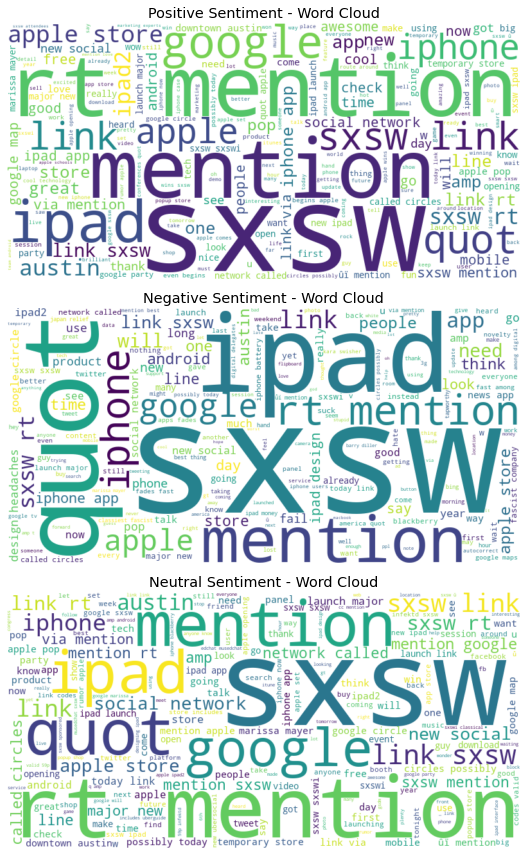

In [31]:
from wordcloud import WordCloud
# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words))

# Plot the word clouds for each sentiment
plt.figure(figsize=(16, 12))

# Positive sentiment word cloud
plt.subplot(3, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment - Word Cloud')

# Negative sentiment word cloud
plt.subplot(3, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment - Word Cloud')

# Neutral sentiment word cloud
plt.subplot(3, 1, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment - Word Cloud')

plt.tight_layout()
plt.show()

## **Text Preprocessing**

To prepare the tweet text for analysis, we'll remove unnecessary elements such as punctuation, stopwords, and special characters. We'll also convert all text to lowercase and perform tokenization. This step will make the text suitable for feeding into a machine learning model.

In [13]:
# Drop rows with missing 'tweet_text' and the unnecessary 'emotion_in_tweet_is_directed_at' column
df_cleaned = df_cleaned.dropna(subset=['tweet_text']).drop(columns=['emotion_in_tweet_is_directed_at'])

# Rename the 'is_there_an_emotion_directed_at_a_brand_or_product' column to 'sentiment'
df_cleaned = df_cleaned.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})

# Remove rows where 'sentiment' column has "I can't tell"
df_cleaned = df_cleaned[df_cleaned['sentiment'] != "I can't tell"]

# Rename 'No emotion toward brand or product' to 'Neutral emotion'
df_cleaned['sentiment'] = df_cleaned['sentiment'].replace("No emotion toward brand or product", "Neutral emotion")

# Display the first few rows of the cleaned dataset
df_cleaned.head()

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [14]:
# Define a function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the preprocessing function to the 'text' column
df_cleaned['processed_text'] = df_cleaned['tweet_text'].apply(preprocess_text)

# Display the cleaned text data
df_cleaned[['tweet_text', 'processed_text']].head()


,tweet_text,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting riseaustin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...


**Cleaning and Removing Punctuation**

In [15]:
english_punctuation = string.punctuation
punctuation_list = english_punctuation
def cleaning_punctuation(text):
  translator = str.maketrans('', '', punctuation_list)
  return text.translate(translator)

In [16]:
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: cleaning_punctuation(x))
df_cleaned["tweet_text"].head()

0    wesley83 I have a 3G iPhone After 3 hrs tweeti...
1    jessedee Know about fludapp  Awesome iPadiPhon...
2    swonderlin Can not wait for iPad 2 also They s...
3    sxsw I hope this years festival isnt as crashy...
4    sxtxstate great stuff on Fri SXSW Marissa Maye...
Name: tweet_text, dtype: object

**Removing Numeric Values**

In [17]:
def cleaning_numbers(text):
  return re.sub('[0-9]+', '', text)
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: cleaning_numbers(x))
df_cleaned["tweet_text"].head()

0    wesley I have a G iPhone After  hrs tweeting a...
1    jessedee Know about fludapp  Awesome iPadiPhon...
2    swonderlin Can not wait for iPad  also They sh...
3    sxsw I hope this years festival isnt as crashy...
4    sxtxstate great stuff on Fri SXSW Marissa Maye...
Name: tweet_text, dtype: object

**Getting Tokenization Of Tweet Text**

In [18]:
tokenizer = RegexpTokenizer(r'\w+') # this match one or more words, digits, underscores
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(tokenizer.tokenize)
df_cleaned['tweet_text'].head(2)

0    [wesley, I, have, a, G, iPhone, After, hrs, tw...
1    [jessedee, Know, about, fludapp, Awesome, iPad...
Name: tweet_text, dtype: object

**Applyig Stemming**

In [238]:
#st = nltk.PorterStemmer()

#def stemming_on_text(data):
  #text = [st.stem(word) for word in data]
 # return text
#df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: stemming_on_text(x))
#df_cleaned['tweet_text'].head()

**Applying Lemmatization**

In [19]:
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return text

In [20]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MARY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MARY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: lemmatizer_on_text(x))
df_cleaned['tweet_text'].head(4)

0    [wesley, I, have, a, G, iPhone, After, hr, twe...
1    [jessedee, Know, about, fludapp, Awesome, iPad...
2    [swonderlin, Can, not, wait, for, iPad, also, ...
3    [sxsw, I, hope, this, year, festival, isnt, a,...
Name: tweet_text, dtype: object

 ## **Vectorizing the processed_text using TF-IDF** 

Step 1: TF-IDF Vectorization

We’ll use TfidfVectorizer from sklearn to transform the processed_text.

Step 2: Train-Test Split

We’ll split the data into training and testing sets after vectorizing.

In [22]:
pip install --upgrade scikit-learn imbalanced-learn

Requirement already up-to-date: scikit-learn in c:\users\mary\anaconda3\envs\learn-env\lib\site-packages (1.3.2)
Requirement already up-to-date: imbalanced-learn in c:\users\mary\anaconda3\envs\learn-env\lib\site-packages (0.12.4)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_cleaned['processed_text']  # Feature: processed tweet text
y = df_cleaned['sentiment']       # Target: sentiment labels

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  
# Fit and transform the processed text into TF-IDF features
X_tfidf = tfidf.fit_transform(X)

# Display the shape of the resulting TF-IDF matrix
X_tfidf.shape

(8936, 5000)

In [24]:
# Convert the sparse TF-IDF matrix to a dense array
tfidf_sample = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Display the first 5 rows and first 10 columns of the TF-IDF matrix
print(tfidf_sample.iloc[:5, :10])

   aapl  aaron   ab  abacus  abba  abc  ability  able  abnormal  absolutely
0   0.0    0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0         0.0
1   0.0    0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0         0.0
2   0.0    0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0         0.0
3   0.0    0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0         0.0
4   0.0    0.0  0.0     0.0   0.0  0.0      0.0   0.0       0.0         0.0


In [25]:
# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

 #Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display shape of training and testing data
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (7148, 5000)
Test data size: (1788, 5000)


In [26]:
df_cleaned

,tweet_text,sentiment,processed_text
0,"[wesley, I, have, a, G, iPhone, After, hr, twe...",Negative emotion,g iphone hrs tweeting riseaustin dead need upg...
1,"[jessedee, Know, about, fludapp, Awesome, iPad...",Positive emotion,know awesome ipadiphone app youll likely appre...
2,"[swonderlin, Can, not, wait, for, iPad, also, ...",Positive emotion,wait ipad also sale sxsw
3,"[sxsw, I, hope, this, year, festival, isnt, a,...",Negative emotion,hope years festival isnt crashy years iphone a...
4,"[sxtxstate, great, stuff, on, Fri, SXSW, Maris...",Positive emotion,great stuff fri sxsw marissa mayer google tim ...
...,...,...,...
9088,"[Ipad, everywhere, SXSW, link]",Positive emotion,ipad everywhere sxsw link
9089,"[Wave, buzz, RT, mention, We, interrupt, your,...",Neutral emotion,wave buzz rt interrupt regularly scheduled sxs...
9090,"[Googles, Zeiger, a, physician, never, reporte...",Neutral emotion,googles zeiger physician never reported potent...
9091,"[Some, Verizon, iPhone, customer, complained, ...",Neutral emotion,verizon iphone customers complained time fell ...


## **Model Building**

Now that we have the text data vectorized and split, we'll now  train a classification model such as Logistic Regression,  or Random Forest.

**1. Logistic Regression**

In [28]:
# Convert sentiment labels into a binary classification task (positive vs. negative)
# Exclude 'No emotion' and 'I can't tell' classes for this binary task
binary_data = df_cleaned[df_cleaned['sentiment'].isin(['Positive emotion', 'Negative emotion'])]
# Re-apply the TF-IDF transformation on the filtered data
X_tfidf_binary = tfidf.transform(binary_data['processed_text'])

# Prepare target variable (1 for positive, 0 for negative)
y_binary = binary_data['sentiment'].apply(lambda x: 1 if x == 'Positive emotion' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Penalty norm (L1 norm is typically supported with 'liblinear' or 'saga')
    'solver': ['liblinear', 'saga']  # Solvers compatible with penalty
}

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search model on the SMOTE data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.948150907792288


## **Fit the model**

After tuning the hyperparameters, we can use the best model (grid_search.best_estimator_) to make predictions on the test set.

In [249]:
# Fit the logistic regression model with the best hyperparameters
best_log_reg = grid_search.best_estimator_

# Fit the model on the SMOTE data
best_log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [250]:
# Predict on the test set
y_pred = best_log_reg.predict(X_test)
# Import performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Display a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on test set: 0.8690140845070422
Classification Report:


               precision    recall  f1-score   support

           0       0.59      0.58      0.59       114
           1       0.92      0.92      0.92       596

    accuracy                           0.87       710
   macro avg       0.76      0.75      0.75       710
weighted avg       0.87      0.87      0.87       710

Confusion Matrix:
 [[ 66  48]
 [ 45 551]]


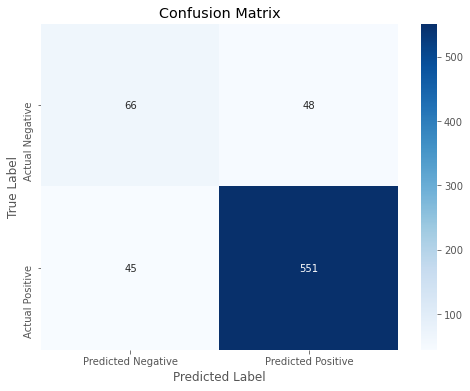

In [251]:
# Define the confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The performance metrics for our logistic regression model show a strong overall accuracy of 86.9% on the test set. However, the performance on the minority class (negative emotion) seems to be less robust than the majority class (positive emotion). Here's a breakdown of the results:

*Key Observations:*

**Class Imbalance:**

The number of positive samples (596) far outweighs the negative samples (114), which can skew metrics like accuracy.

Despite using SMOTE to balance the training data, the model might still struggle to generalize on the minority class in the test set.

Precision, Recall, and F1-Score:

**For class 0 (negative emotion):**

Precision: 0.59 – out of all instances predicted as negative, 59% were correct.

Recall: 0.58 – out of all actual negative instances, 58% were correctly classified.

F1-Score: 0.59 – a balanced measure of precision and recall, showing the model’s difficulty in predicting negative instances.

**For class 1 (positive emotion):**

Precision: 0.92 – out of all instances predicted as positive, 92% were correct.

Recall: 0.92 – out of all actual positive instances, 92% were correctly classified.

F1-Score: 0.92 – showing that the model performs well for the majority class.

**Confusion Matrix:**

True Negatives (66): The model correctly predicted 66 negative samples.

False Positives (48): The model misclassified 48 negative samples as positive.

True Positives (551): The model correctly predicted 551 positive samples.

False Negatives (45): The model misclassified 45 positive samples as negative.

# **2. Random Forest**

In [252]:
from sklearn.ensemble import RandomForestClassifier
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

# Generate the classification report
classification_report_best_rf = classification_report(y_test, y_pred_best_rf)

# Create the confusion matrix
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Print results
print(f"Accuracy on test set: {accuracy_best_rf}")
print("Classification Report:")
print(classification_report_best_rf)
print("Confusion Matrix:")
print(conf_matrix_best_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on test set: 0.8816901408450705
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.40      0.52       114
           1       0.90      0.97      0.93       596

    accuracy                           0.88       710
   macro avg       0.82      0.69      0.73       710
weighted avg       0.87      0.88      0.87       710

Confusion Matrix:
[[ 46  68]
 [ 16 580]]


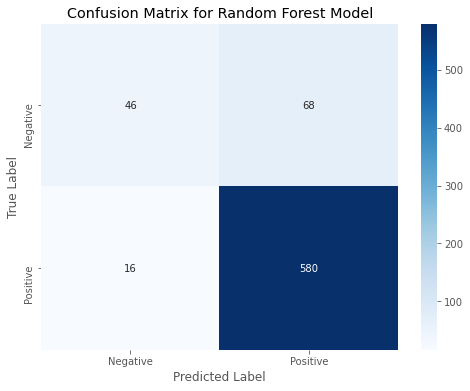

In [253]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

**Accuracy on Test Set:** 0.8817 (approximately 88.17% of the predictions were correct)

**Classification Report:**

**For class 0 (Negative):**

Precision: 0.74 (of the instances predicted as negative, 74% were actually negative)

Recall: 0.40 (of the actual negatives, only 40% were correctly identified)

F1-score: 0.52 (harmonic mean of precision and recall, indicating moderate performance)

**For class 1 (Positive):**

Precision: 0.90

Recall: 0.97

F1-score: 0.93 (excellent performance)

**Confusion Matrix:**

True Negatives (TN): 46 (actual negative cases correctly predicted as negative)

False Positives (FP): 68 (actual negative cases incorrectly predicted as positive)

False Negatives (FN): 16 (actual positive cases incorrectly predicted as negative)

True Positives (TP): 580 (actual positive cases correctly predicted as positive